## Loading data and relevant libraries

- Twaice data set sent via email Feb 10th

- First step is to choose the tools we want to use and read in the data. We decide to use plotly due to the interactive feature, maybe this is what Twaice uses in their software anyways so good to learn.
- pandas is used to work with its dataframe objects
- numpy is used for derivative calcs
- path lib is used for beautification for inline plots using plotly

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from pathlib import Path

cell_meta_data = pd.ExcelFile('batch.xlsx') #using ExcelFile object
cell_parameters_overview = pd.read_excel('batch.xlsx', sheet_name=0) #for test parameter setup
list_cell_names = cell_meta_data.sheet_names #get cell_id as a list

the data dic contains the raw data, where cell_ids are the keys and the values are the dataframes containing SOH_c and EFC.

In [2]:
data_dic = dict()
for i in list(range(1,max(range(len(list_cell_names)))+1)):
    data_dic[list_cell_names[i]] = pd.read_excel('batch.xlsx', sheet_name=i)

## Testing conditions
- Goal: Get to know the testing conditions and their uniqueness.

In [3]:
dic_unique_conditions = dict()
for conditions in list(cell_parameters_overview):
    dic_unique_conditions[conditions] = cell_parameters_overview[conditions].unique()
for conditions in list(cell_parameters_overview):
    print(f"Data set has for {conditions} these unique parameters: {dic_unique_conditions[conditions]}")

Data set has for Cell these unique parameters: [ 1  2  4  5  6  8  9 10 12 13 14]
Data set has for AgingType these unique parameters: ['Cyclic']
Data set has for T these unique parameters: [25 40 10]
Data set has for mSOC these unique parameters: [50 80 20 40]
Data set has for DOD these unique parameters: [100  30  60]
Data set has for C_ch these unique parameters: [1.  0.5 1.4]
Data set has for C_dis these unique parameters: [2.  1.  0.5 2.3]


# Creating an interactive plot
- We can then use this plot for exploration based on the criteria of interest mentioned above, and we can also hand this to our scooter customer (as they probably also have data/cell engineers on their teams)

In [4]:
color_dic = {
    "Cell_01":"turquoise",
    "Cell_02":"maroon",
    "Cell_04":"darkorange",
    "Cell_05":"mediumblue",
    "Cell_06":"yellow",
    "Cell_08":"darkcyan",
    "Cell_09":"chartreuse",
    "Cell_10":"darkviolet",
    "Cell_12":"midnightblue",
    "Cell_13":"dodgerblue",
    "Cell_14":"red"
}
fig1 = make_subplots(rows=2,cols=1,shared_xaxes=True, 
                    specs=[[{"secondary_y":True}],[{"secondary_y":True}]]
                           )

for cell_id in list_cell_names[1::]:
    fig1.add_trace(
        go.Scatter(
            x=data_dic[cell_id].EFC,
            y = data_dic[cell_id].SOHc_measurement,
            name = f"{cell_id}_SOHc",
            mode = "markers",
            marker = dict(
                color = color_dic[cell_id],
                symbol = "x",
                size = 5
            ),
            legendgroup="group",
            legendgrouptitle_text = "SOH_capacity"
            
        ),
        secondary_y=False,row=1,col=1  
    )
    
for cell_id in list_cell_names[1::]:
    xprime = []
    for i in range(len(data_dic[cell_id].SOHc_measurement)-1):
        xtemp = (data_dic[cell_id].EFC[i+1]+data_dic[cell_id].EFC[i])/2
        xprime = np.append(xprime,xtemp)
    
    fig1.add_trace(
        go.Scatter(
            x = xprime,
            y = np.diff(data_dic[cell_id].SOHc_measurement)/np.diff(data_dic[cell_id].EFC),
            name = f"{cell_id}_derivative",
            mode = "lines",
            marker = dict(
                color = color_dic[cell_id],   
            ),
            legendgroup="group2",
            legendgrouptitle_text = "deriv capacity over cycle"
        ),
        secondary_y=False,row=2,col=1
    )

fig1.update_layout(
    title = {'text':"Data discovery of Scoot-e cells powered by Twaice, literally", 'y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},
    legend=dict(groupclick="toggleitem"),
)

fig1.update_xaxes(
    title_text = "full equivalent cycle /-", row=2,col=1
)
fig1.update_yaxes(
    title_text = "state of health capacity /  ", 
    row=1,col=1
)
fig1.update_yaxes(
    title_text = "derivative d_SOC/d_fec /  ", 
    range = [-0.15,0.02], #to see differences in capacity decay better, set this to be static, otherwise plotly adjusts ranges dynamically
    row=2,col=1
)
#fig1.show()
fig1.update_layout(legend=dict(groupclick="toggleitem", font=dict(size = 10)))

## Data download
- non-interactive plot will be saved here
- HTML is saved as well for exploration

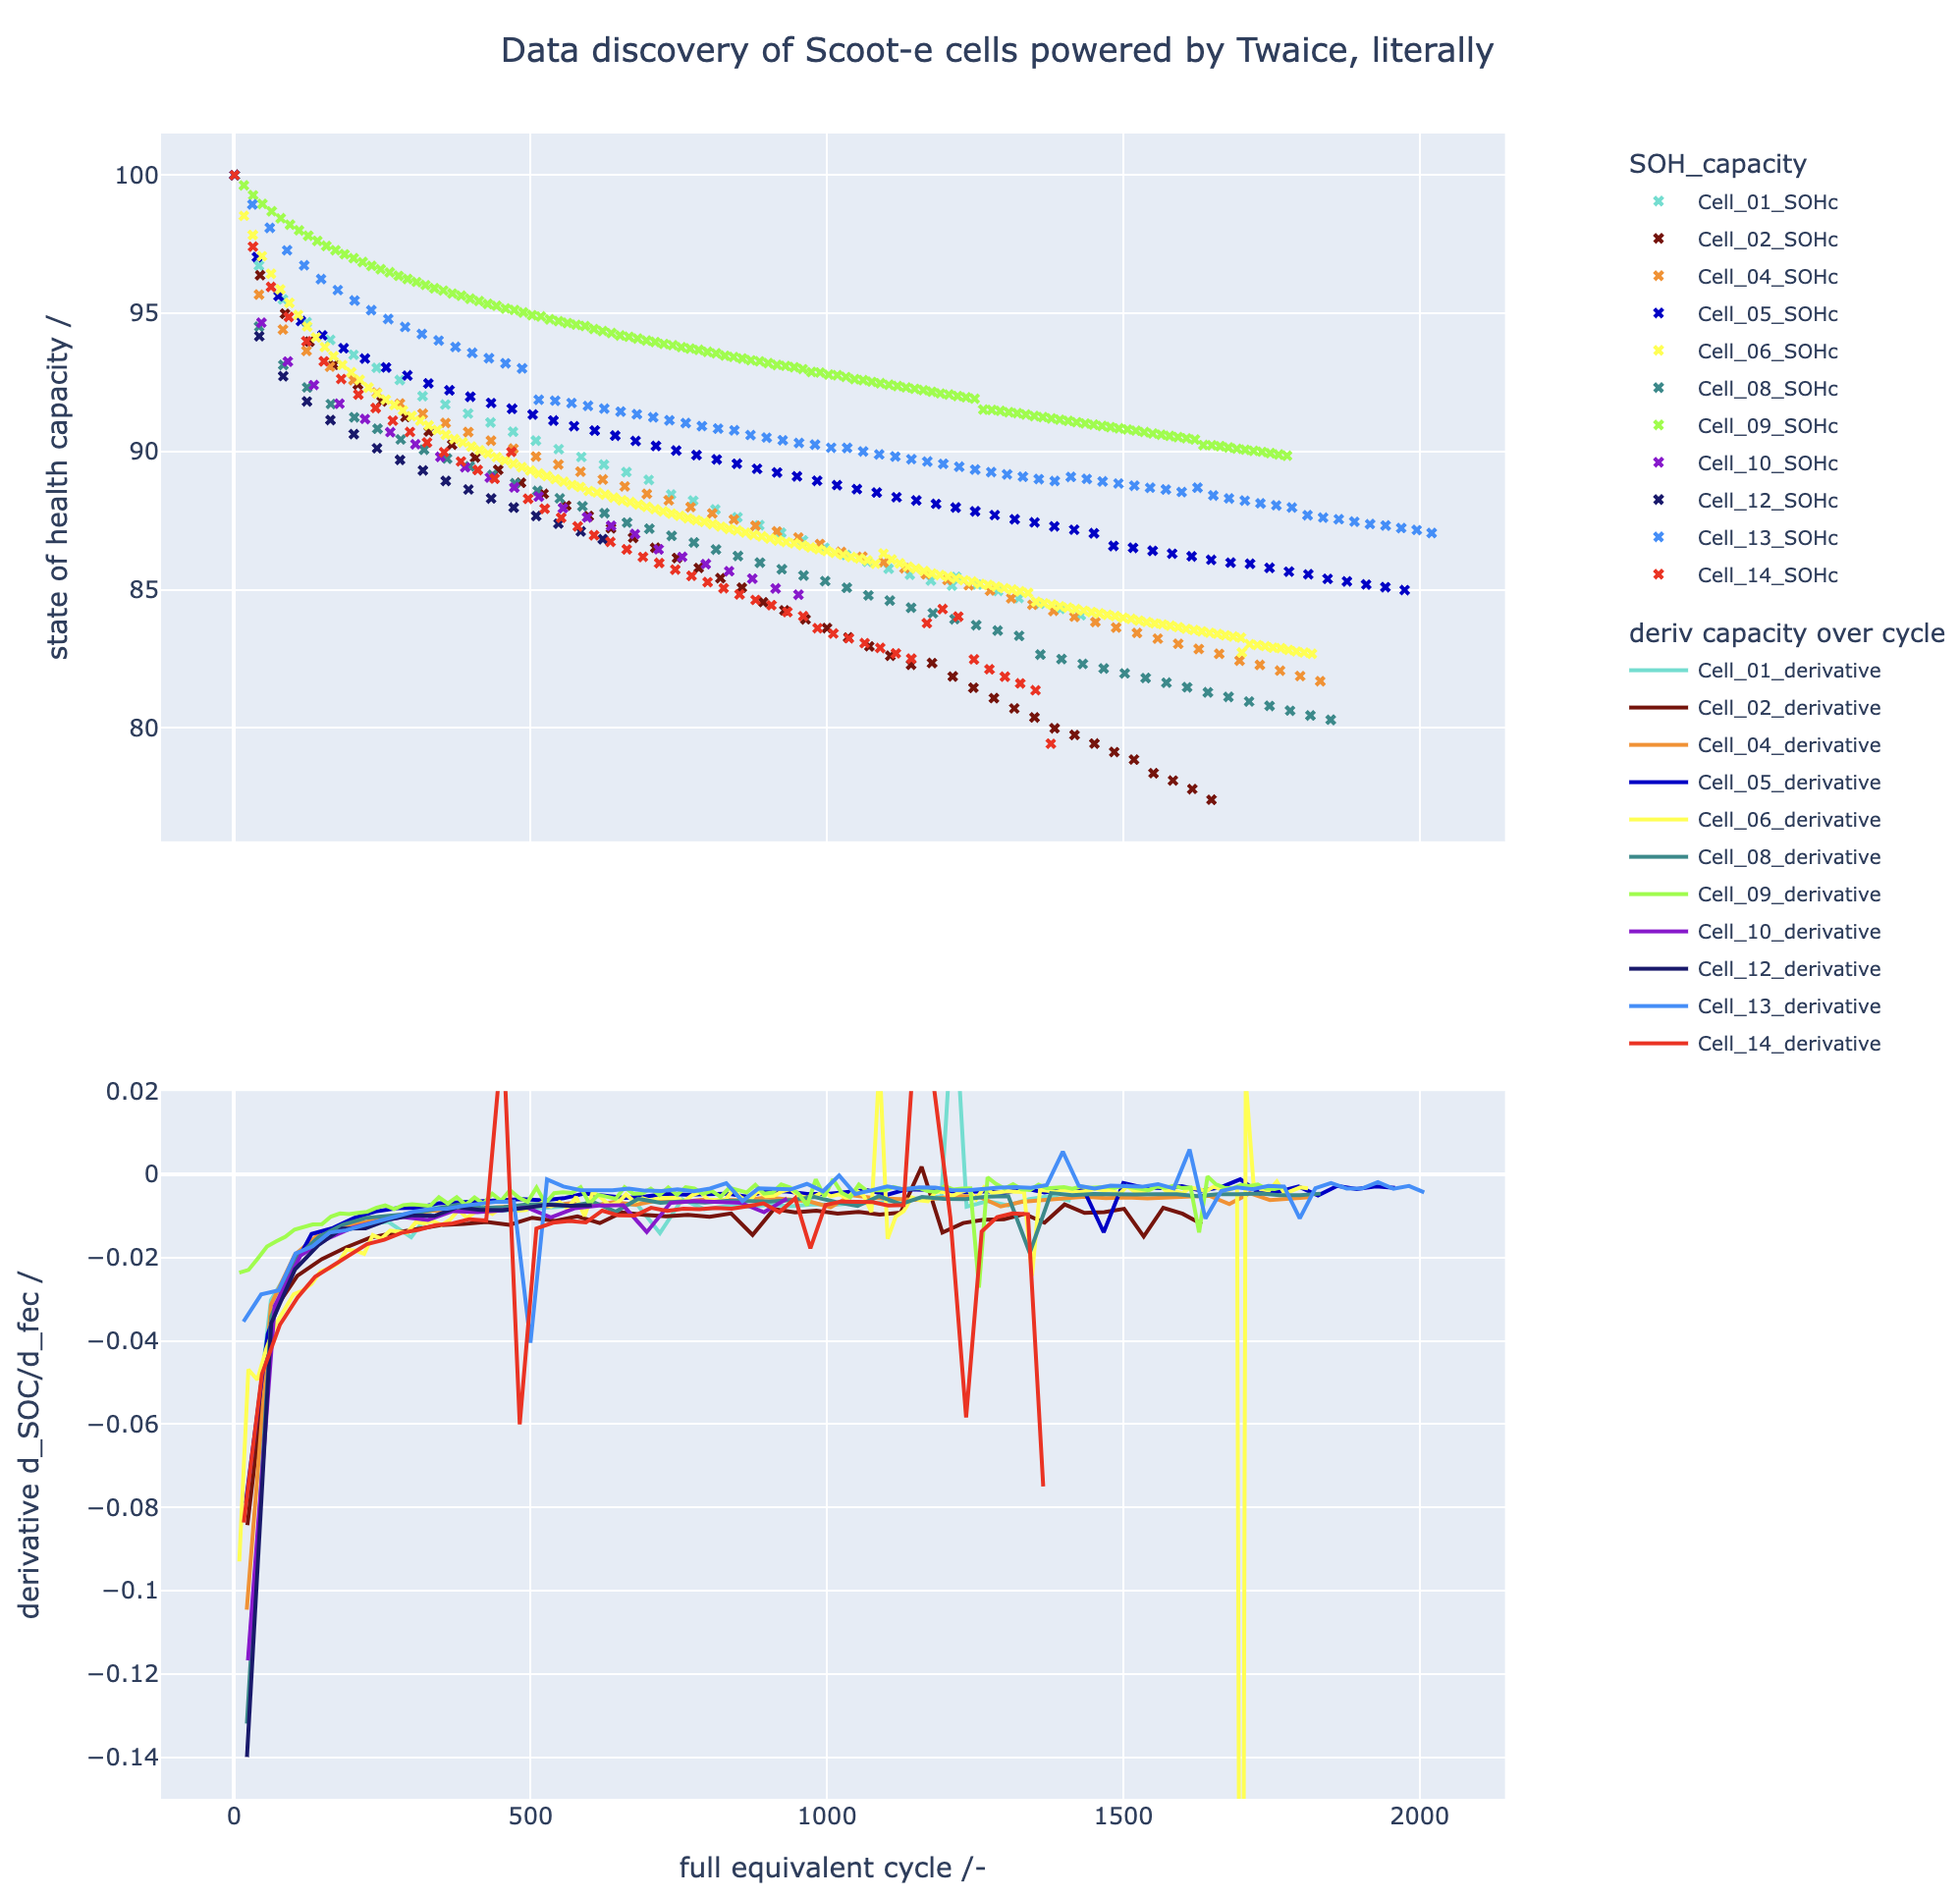

In [5]:
from pathlib import Path
from IPython import display
import kaleido
working_path = Path(r"/Users/lukasgraser/Library/CloudStorage/OneDrive-Personal/Orga/Bewerbung/Twaice_Bewerbung/Experience_day_prep")
fig1.write_image(working_path / "scoot_e_data.png")
display.Image(working_path / "notebook_show.png")

In [6]:
fig1.write_html(working_path / "scoot_e_data.html") #export for customer
